In [240]:
import warnings
warnings.filterwarnings('ignore')

In [241]:
pip install pyecharts

In [242]:
pip install chart_studio

In [243]:
import pyecharts

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator
import seaborn as sns
from datetime import datetime
from matplotlib import font_manager, rc

from pyecharts.charts import Bar
from pyecharts.charts import Line

In [245]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [246]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Ethereum.csv'

-rw------- 1 root root 75337 Nov 15 08:31 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
-rw------- 1 root root 17367 Nov 15 09:47 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'
-rw------- 1 root root 24702 Nov 16 07:18 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin.csv'
-rw------- 1 root root 30724 Nov 16 07:33 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Ethereum.csv'


In [247]:
DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv')
# DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv')
# DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin.csv')
DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Ethereum.csv')

In [248]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2662 non-null   object 
 1   coin_name  2662 non-null   object 
 2   num        2662 non-null   int64  
 3   s          2662 non-null   float64
 4   lang       2662 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 104.1+ KB


In [249]:
DF.groupby('coin_name')['coin_name'].count()

coin_name
ada     253
bch     227
btc     298
doge    164
eos      41
eth     346
omg     526
snt     742
xrp      65
Name: coin_name, dtype: int64

In [250]:
# DF_bch = DF[DF['coin_name'] == 'bch']
# DF_bch = DF[DF['coin_name'] == 'btc']
DF_bch = DF[DF['coin_name'] == 'eth']

In [251]:
DF_bch

,date,coin_name,num,s,lang
698,2020-08-12,eth,1,2.000000,kor
699,2020-08-13,eth,3,1.000000,kor
700,2020-08-14,eth,1,2.000000,kor
701,2020-08-15,eth,1,0.000000,kor
702,2020-08-16,eth,1,1.000000,kor
...,...,...,...,...,...
2559,2021-10-31,eth,1,0.000000,kor
2568,2021-11-01,eth,3,0.666667,kor
2585,2021-11-03,eth,1,0.000000,kor
2594,2021-11-04,eth,2,0.000000,kor


In [252]:
DF_bch = DF_bch.reset_index(drop=True)

In [253]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      408 non-null    object
 1   Price     408 non-null    object
 2   Open      408 non-null    object
 3   High      408 non-null    object
 4   Low       408 non-null    object
 5   Vol.      408 non-null    object
 6   Change %  408 non-null    object
dtypes: object(7)
memory usage: 22.4+ KB


In [254]:
DF_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 12, 2021","4,667.31","4,720.50","4,807.16","4,511.96",634.59K,-1.13%
1,"Nov 11, 2021","4,720.87","4,633.98","4,778.17","4,578.66",418.61K,1.87%
2,"Nov 10, 2021","4,634.03","4,731.83","4,864.06","4,498.78",761.90K,-2.07%
3,"Nov 09, 2021","4,731.83","4,808.34","4,836.69","4,715.43",437.41K,-1.59%
4,"Nov 08, 2021","4,808.38","4,612.05","4,822.97","4,612.05",673.21K,4.26%


In [255]:
DF_price['Price'][178]

'3,377.55'

In [256]:
DF_price['Price'][178] = DF_price['Price'][178].replace(',','')

In [257]:
DF_price['Price'][178]

'3377.55'

In [258]:
for i in range(len(DF_price['Price'])):
  DF_price['Price'][i] = DF_price['Price'][i].replace(',','')



In [259]:
DF_price['Price'][178]

'3377.55'

In [260]:
DF_price['Price'][178] = pd.to_numeric(DF_price['Price'][178], downcast = 'float')

In [261]:
type(DF_price['Price'][179])

str

In [262]:
for i in range(len(DF_price['Price'])):
  DF_price['Price'][i] = pd.to_numeric(DF_price['Price'][i], downcast = 'float')

In [263]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      408 non-null    object
 1   Price     408 non-null    object
 2   Open      408 non-null    object
 3   High      408 non-null    object
 4   Low       408 non-null    object
 5   Vol.      408 non-null    object
 6   Change %  408 non-null    object
dtypes: object(7)
memory usage: 22.4+ KB


In [264]:
date_time_obj = datetime.strptime(DF_price['Date'][0], '%b %d, %Y')
date_time_obj

datetime.datetime(2021, 11, 12, 0, 0)

In [265]:
date_time_obj.strftime("%Y-%m-%d")

'2021-11-12'

In [266]:
DF_price.iloc[0]

Date        Nov 12, 2021
Price            4667.31
Open            4,720.50
High            4,807.16
Low             4,511.96
Vol.             634.59K
Change %          -1.13%
Name: 0, dtype: object

In [308]:
A = []
for i in range(246):
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  A.append(a)

In [309]:
B = []
for i in range(246):
  x = DF_price['Price'][i]
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  Y = [a,x]
  B.append(Y)
DF_B = pd.DataFrame(B)
DF_B.columns = ['date','price']

In [269]:
# for i in DF_B['date']:
#   for j in DF_bch['date']:
#     if i == j:
#       print('매치', i, j)


In [326]:
C = []
for i in range(len(DF_B)):
  for j in range(len(DF_bch)):
    if DF_B['date'][i] == DF_bch['date'][j]:
      # print('매치', i, j , DF_B['date'][i], DF_bch['date'][j], DF_B['price'][i], DF_bch['s'][j])
      a = DF_B['date'][i]
      b = DF_B['price'][i]
      c = DF_bch['s'][j]
      d = DF_bch['num'][j]
      Y = [a,b,c,d]
      C.append(Y)
      
DF_bch_F = pd.DataFrame(C)
DF_bch_F.columns = ['date','price','s','num']

In [311]:
DF_bch_F

,date,price,s,num
0,2021-11-08,4808.379883,0.000000,3
1,2021-11-04,4535.109863,0.000000,2
2,2021-11-03,4602.209961,0.000000,1
3,2021-11-01,4320.850098,0.666667,3
4,2021-10-31,4287.560059,0.000000,1
...,...,...,...,...
171,2021-03-16,1804.849976,0.400000,5
172,2021-03-15,1792.380005,0.750000,4
173,2021-03-14,1849.060059,2.000000,1
174,2021-03-13,1921.130005,1.250000,4


In [312]:
# DF_bch_F.sort_values(by = 'date', axis = 0,ascending=True)
# # DF_bch_F = DF_bch_F.reset_index(drop=True)

In [277]:
# DF_bch_F = DF_bch_F.reset_index( inplace=True)

In [278]:
y_values = DF_bch_F['s']

In [279]:
z_values = DF_bch_F['price']

In [280]:
x_values = DF_bch_F['date']	

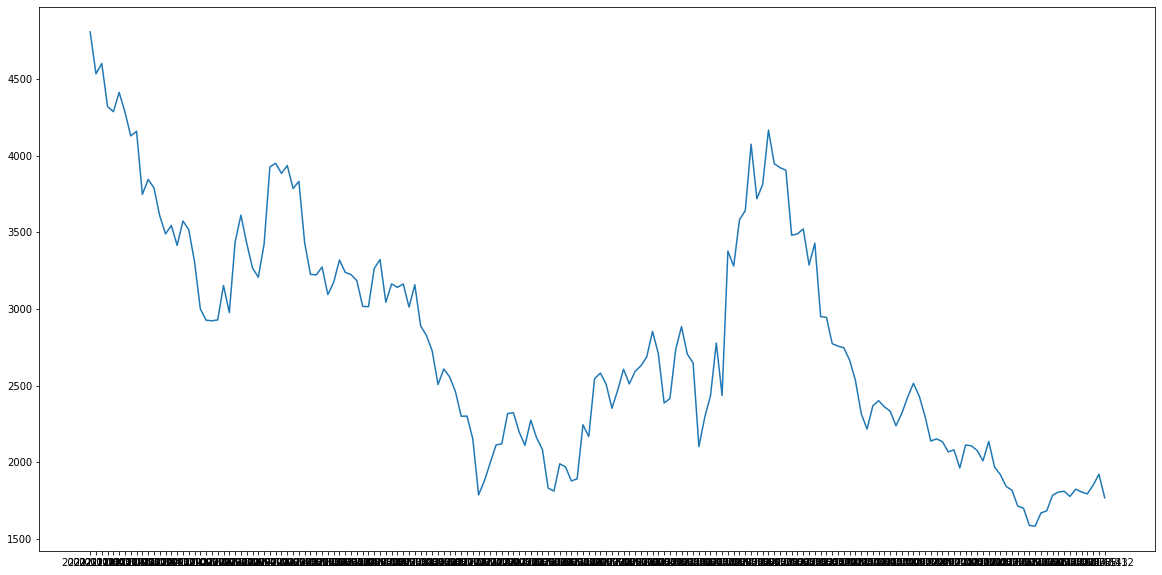

In [281]:
ax = plt.plot(x_values,z_values)
plt.show()

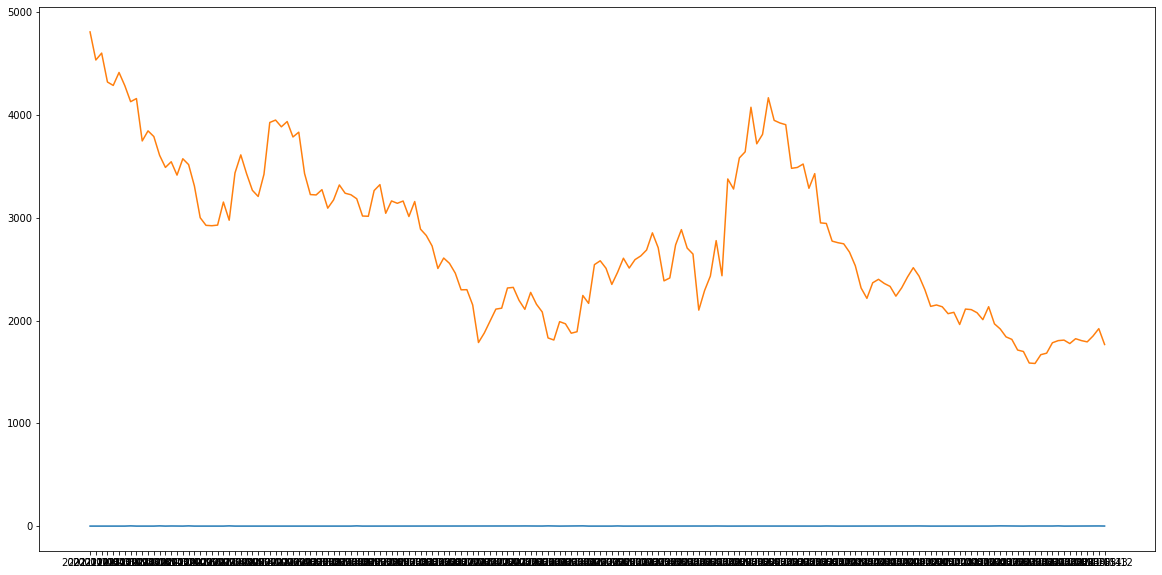

In [282]:
plt.figure(figsize=(20,10))

x_values = DF_bch_F['date']	
y_values = DF_bch_F['s']
z_values = DF_bch_F['price']
plt.plot(x_values, y_values)	
plt.plot(x_values, z_values)

plt.show()

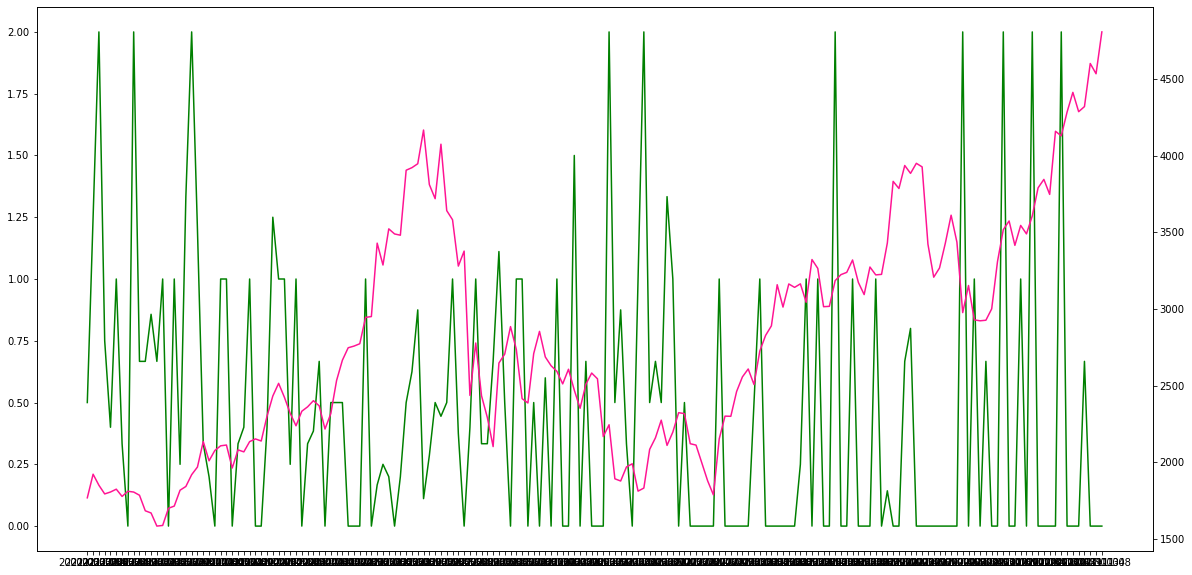

In [302]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax1 = plt.subplots()
ax1.plot(x_values, y_values , color = 'green')

ax2 = ax1.twinx()
ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.show()

In [303]:
import plotly.offline as plyo
import cufflinks

In [328]:
DF_bch_F1 = DF_bch_F.set_index("date")

In [329]:
DF_bch_F1

,price,s,num
date,,,
2021-11-08,4808.379883,0.000000,3
2021-11-04,4535.109863,0.000000,2
2021-11-03,4602.209961,0.000000,1
2021-11-01,4320.850098,0.666667,3
2021-10-31,4287.560059,0.000000,1
...,...,...,...
2021-03-16,1804.849976,0.400000,5
2021-03-15,1792.380005,0.750000,4
2021-03-14,1849.060059,2.000000,1


In [330]:
DF_bch_F1 ['s'] = -1*(DF_bch_F1['s']-1)*(DF_bch_F1['num'])*500

In [331]:
plyo.iplot(DF_bch_F1.iplot(asFigure=True))

In [332]:
DF_bch_x = DF_bch_F1

In [333]:
for i in range(len(DF_bch_F1)):
  if DF_bch_F1['num'][i] <= 5 :
    DF_bch_x['s'][i] = 0
    # print('yes')
  # else :
  #   # print('no')


In [334]:
plyo.iplot(DF_bch_x.iplot(asFigure=True))

In [ ]:
# x_values = DF_bch_Fx2['date']	
# y_values = DF_bch_Fx2['s']
# z_values = DF_bch_Fx2['price']

# plt.rcParams['figure.figsize'] = (20, 10)
# fig, ax1 = plt.subplots()
# ax1.plot(x_values, y_values , color = 'green')

# ax2 = ax1.twinx()
# ax2.invert_xaxis()
# ax2.plot(x_values, z_values , color = 'deeppink')

# plt.show()